In [1]:
# LIBS
import numpy as np
import math as math
import pandas as pd

# SK LEARN COMPONENTS
from sklearn import decomposition, preprocessing
from sklearn.decomposition import FactorAnalysis, PCA

# Also factor_analyzer for promax rotation, still missing in sklearn.
from factor_analyzer import FactorAnalyzer 

# DISPLAY
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
# DATA
DIR = "/home/l/AnacondaProjects/Badanie_psychometryczne/"
Badanie_Dirty = pd.read_csv(DIR + "Badanie.csv")

In [20]:
# DATA CLEANING, SEPARATE QUESTIONARIES DF PREPARATION, NORMALIZATION
Badanie_Dirty[['Twój Mail']] = Badanie_Dirty[['Twój Mail']].where(Badanie_Dirty[['Twój Mail']].isnull(), 1).fillna(0).astype(int)
Badanie_Dirty['Podaj swoją płeć '] = Badanie_Dirty['Podaj swoją płeć '].map({'Kobieta': 1, 'Mężczyzna': 2})
Badanie_Dirty['Czy kiedy kolwiek używałeś aplikacji Tinder?'] = Badanie_Dirty['Czy kiedy kolwiek używałeś aplikacji Tinder?'].map({'Tak': 1, 'Nie': 0})

Badanie_Dirty.insert(0, 'ID', range(len(Badanie_Dirty)))
Badanie_Dirty['ID'] += 1
del Badanie_Dirty['Sygnatura czasowa']
Badanie_Dirty.reset_index(drop = True, inplace = True)

ID = Badanie_Dirty.iloc[:,:1]
End = Badanie_Dirty.iloc[:,-1:]

Metryczka = Badanie_Dirty.iloc[:,:4]
Metryczka = pd.concat([Metryczka, End], axis=1)
Metryczka.columns = ["ID","Sex","Age","Tinder","Mail"]
Metryczka['Age'] = Metryczka['Age'].replace(',21', '21')
Metryczka['Age'] = Metryczka['Age'].astype('float64')

min_max_scaler = preprocessing.MinMaxScaler()

GlownyArkusz = Badanie_Dirty.iloc[:,4:19]
MAIN_my_questions = [x for x in GlownyArkusz.columns] # I will use this later for FOG.
GlownyArkusz.columns = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15"]
np_scaled = min_max_scaler.fit_transform(GlownyArkusz)
GlownyArkusz = pd.DataFrame(np_scaled, columns = GlownyArkusz.columns)
GlownyArkusz_M = pd.concat([Metryczka, GlownyArkusz], axis=1)

TIPI = Badanie_Dirty.iloc[:,19:29]
TIPI_my_questions = [x for x in TIPI.columns] # I will use this later for FOG.
TIPI.columns = ["TP1","TP2","TP3","TP4","TP5","TP6","TP7","TP8","TP9","TP10"]
np_scaled = min_max_scaler.fit_transform(TIPI)
TIPI = pd.DataFrame(np_scaled, columns = TIPI.columns)
TIPI_M = pd.concat([Metryczka, TIPI], axis=1)

SES = Badanie_Dirty.iloc[:,29:39] # Scale in SES is reversed !
SES_my_questions = [x for x in SES.columns] # I will use this later for FOG.
SES.columns = ["SP1","SP2","SP3","SP4","SP5","SP6","SP7","SP8","SP9","SP10"]
np_scaled = min_max_scaler.fit_transform(SES)
SES = pd.DataFrame(np_scaled, columns = SES.columns)
SES_M = pd.concat([Metryczka, SES], axis=1)

ALL = pd.concat([Metryczka, GlownyArkusz, TIPI, SES], axis=1)


# So my clean datasets are 
# (with _M as SES_M i get my answers with initial metrica):

# GlownyArkusz
# TIPI
# SES
# ALL # all data


# Here with ID

#GlownyArkusz = pd.concat([ID, GlownyArkusz], axis=1)
#TIPI = pd.concat([ID, TIPI], axis=1)
#SES = pd.concat([ID, SES], axis=1)

In [21]:
ALL

,ID,Sex,Age,Tinder,Mail,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,TP1,TP2,TP3,TP4,TP5,TP6,TP7,TP8,TP9,TP10,SP1,SP2,SP3,SP4,SP5,SP6,SP7,SP8,SP9,SP10
0,1,2,24.0,0,0,0.75,1.00,1.00,1.00,1.00,0.25,0.00,1.00,1.00,1.00,1.00,0.75,1.00,0.00,0.50,0.833333,0.166667,1.000000,0.166667,0.666667,0.166667,0.833333,0.000000,0.833333,0.500000,0.000000,0.000000,1.000000,0.333333,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1,2,1,24.0,0,0,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,1.00,0.25,0.25,0.833333,0.166667,1.000000,0.166667,0.833333,0.000000,0.833333,0.000000,0.833333,0.833333,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.333333,0.666667
2,3,1,43.0,0,0,0.75,1.00,0.50,0.75,0.75,0.75,1.00,1.00,0.50,0.50,1.00,0.75,1.00,0.50,0.50,0.833333,0.666667,1.000000,0.666667,1.000000,0.166667,1.000000,1.000000,0.500000,0.666667,1.000000,1.000000,0.666667,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667
3,4,1,30.0,0,1,1.00,0.50,0.50,0.50,0.50,0.25,0.75,1.00,0.50,0.50,0.75,0.25,0.75,0.25,0.75,0.666667,0.166667,0.666667,0.500000,0.666667,0.000000,0.833333,0.166667,0.500000,0.500000,0.666667,0.666667,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.000000,0.000000
4,5,1,33.0,1,1,0.75,0.75,1.00,0.75,0.25,0.00,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.00,0.25,1.000000,0.500000,0.666667,0.000000,0.833333,0.000000,0.666667,0.166667,0.666667,0.666667,0.000000,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.666667,0.333333,0.333333
5,6,1,44.0,0,1,0.75,0.75,0.75,0.50,0.50,0.00,0.75,0.75,1.00,0.75,1.00,0.50,1.00,1.00,0.25,0.500000,0.500000,1.000000,1.000000,0.500000,0.166667,0.833333,0.166667,0.000000,0.500000,0.666667,0.666667,0.000000,0.666667,1.000000,0.000000,0.000000,0.666667,0.000000,1.000000
6,7,2,35.0,0,0,0.75,0.75,1.00,0.50,0.50,0.25,0.25,1.00,0.75,0.50,0.50,0.25,0.75,0.00,0.25,0.166667,0.000000,0.500000,0.166667,0.333333,0.666667,0.666667,0.500000,0.500000,0.833333,0.000000,0.333333,1.000000,0.666667,0.333333,0.000000,0.333333,1.000000,0.666667,0.666667
7,8,1,42.0,0,0,1.00,0.00,0.75,1.00,1.00,0.00,0.00,0.75,1.00,0.50,0.75,0.00,1.00,0.00,0.00,1.000000,0.500000,1.000000,0.500000,1.000000,0.000000,0.500000,0.000000,0.333333,0.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000
8,9,2,29.0,0,0,1.00,0.75,0.50,0.75,0.75,0.25,0.25,0.75,0.25,0.25,0.50,0.25,0.75,0.25,0.25,0.666667,0.166667,0.666667,0.833333,0.333333,0.833333,0.833333,0.500000,0.166667,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,1.000000,1.000000,1.000000
9,10,2,29.0,0,1,1.00,0.75,0.50,0.75,0.75,0.25,0.25,0.75,0.25,0.25,0.50,0.25,0.75,0.25,0.25,0.666667,0.166667,0.666667,0.833333,0.333333,0.833333,0.833333,0.500000,0.166667,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,1.000000,1.000000,1.000000


In [22]:
# Calculating Gunnigan FOG index for my questionaries questions to see if they are understood.
    
def FOG(questions,long_words,name):
    def count_words(questions):
        words_num = 0
        for each in questions:
            words_in_sentence = each[3:].split(" ")
            words_num += len([str for str in words_in_sentence if str])
        return words_num
    long_words_mod = 100* long_words / count_words(questions)
    GunniganFog = 0.4*((count_words(questions) / len(questions)) + long_words_mod)
    print(name,"questions scored", round(GunniganFog,2), "/ 22 on FOG-PL.")

All_questions = [[MAIN_my_questions, 2,"MAIN"],[TIPI_my_questions,2,"TIPI"], [SES_my_questions,3,"SES"]]
# Questions / Nr of 4 sillabes+ words / Name
# Unfortunetly there is no nltk corups for PL language to count it, so its manual count

for each in All_questions:
    FOG(each[0],each[1],each[2])

print("\nTL;DR interpretation: questions will be understood by guys in elementary.")

MAIN questions scored 3.32 / 22 on FOG-PL.
TIPI questions scored 3.58 / 22 on FOG-PL.
SES questions scored 4.6 / 22 on FOG-PL.

TL;DR interpretation: questions will be understood by guys in elementary.


In [23]:
# For each question check if answers differ:
GlownyArkusz.std()

P1     0.272824
P2     0.294531
P3     0.288583
P4     0.286415
P5     0.260590
P6     0.297129
P7     0.377494
P8     0.252739
P9     0.295781
P10    0.318371
P11    0.247876
P12    0.284532
P13    0.275308
P14    0.296753
P15    0.294612
dtype: float64

In [24]:
GlownyArkusz.mean()

P1     0.678044
P2     0.651292
P3     0.582103
P4     0.573801
P5     0.593173
P6     0.336716
P7     0.405904
P8     0.784133
P9     0.503690
P10    0.522140
P11    0.686347
P12    0.373616
P13    0.686347
P14    0.198339
P15    0.400369
dtype: float64

In [25]:
GlownyArkusz.corr()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15
P1,1.000000,0.490310,0.269361,0.157082,0.163025,-0.256841,-0.295243,0.532599,0.184022,0.178311,0.229817,0.207450,0.518188,-0.217634,0.083274
P2,0.490310,1.000000,0.319022,0.278758,0.265039,-0.253626,-0.239995,0.378163,0.243340,0.243099,0.357514,0.322922,0.618784,-0.222763,0.142342
P3,0.269361,0.319022,1.000000,0.660175,0.393479,-0.380295,-0.283675,0.316895,0.725941,0.602455,0.487540,0.372103,0.421479,-0.607124,0.186417
P4,0.157082,0.278758,0.660175,1.000000,0.475093,-0.410044,-0.370151,0.233686,0.712674,0.583654,0.470718,0.438689,0.359231,-0.543252,0.246572
P5,0.163025,0.265039,0.393479,0.475093,1.000000,-0.424623,-0.225867,0.274885,0.452014,0.379614,0.604617,0.415405,0.373365,-0.278773,0.163575
P6,-0.256841,-0.253626,-0.380295,-0.410044,-0.424623,1.000000,0.368134,-0.172106,-0.406642,-0.314013,-0.408791,-0.401066,-0.336931,0.324024,-0.218262
P7,-0.295243,-0.239995,-0.283675,-0.370151,-0.225867,0.368134,1.000000,-0.298607,-0.322367,-0.209878,-0.234942,-0.184403,-0.307308,0.251939,0.009055
P8,0.532599,0.378163,0.316895,0.233686,0.274885,-0.172106,-0.298607,1.000000,0.267706,0.335791,0.300846,0.230813,0.590242,-0.275781,0.058276
P9,0.184022,0.243340,0.725941,0.712674,0.452014,-0.406642,-0.322367,0.267706,1.000000,0.709542,0.498907,0.396135,0.383814,-0.535820,0.227373
P10,0.178311,0.243099,0.602455,0.583654,0.379614,-0.314013,-0.209878,0.335791,0.709542,1.000000,0.463778,0.322314,0.338338,-0.568529,0.270398


In [26]:
plt.matshow(GlownyArkusz.corr())

NameError: name 'plt' is not defined

In [27]:


# Global KMO
corr_matrix = GlownyArkusz.corr()
corr_inv = np.linalg.inv(corr_matrix)
nrow_inv_corr, ncol_inv_corr = corr_matrix.shape
A = np.ones((nrow_inv_corr,ncol_inv_corr))
for i in range(0,nrow_inv_corr,1):
    for j in range(i,ncol_inv_corr,1):
        A[i,j] = (corr_inv[i,j])/(math.sqrt(corr_inv[i,i] *corr_inv[j,j]))
        A[j,i] = A[i,j]
dataset_corr = np.asarray(corr_matrix)
kmo_num = np.sum(np.square(dataset_corr))-np.sum(np.square(np.diagonal(dataset_corr)))
kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
kmo_value = kmo_num/kmo_denom

# KMO per variable
kmo_j = [None]*dataset_corr.shape[1]
for j in range(0,dataset_corr.shape[1]):
    kmo_j_num = np.sum(dataset_corr[:,[j]]**2) - dataset_corr[j,j] **2
    kmo_j_denom = kmo_j_num + np.sum(A[:,[j]] **2) - A[j,j] **2
    kmo_j[j] = kmo_j_num / kmo_j_denom

# Print results
print("Global KMO:",kmo_value,"\nInterpretation: KMO score is much above 0.75, closer to 1, so data is ok to perform a Factor Analysis.","\n")
nr = 1
for each in kmo_j:
    print(each, " - question", nr)
    nr +=1
    
print("\nAlthough question 15 looks suspicous.")

Global KMO: 0.879911478987269 
Interpretation: KMO score is much above 0.75, closer to 1, so data is ok to perform a Factor Analysis. 

0.8422511220228621  - question 1
0.8554563220088388  - question 2
0.9170628410173866  - question 3
0.9149974007247129  - question 4
0.887599050193889  - question 5
0.9086843065969555  - question 6
0.86307655015356  - question 7
0.8135417807124511  - question 8
0.8817575504911522  - question 9
0.8833951118339745  - question 10
0.8860468153428703  - question 11
0.8575330441310269  - question 12
0.8711699808553263  - question 13
0.9144230531663029  - question 14
0.7729785381017845  - question 15

Although question 15 looks suspicous.


In [28]:
#corr_matrix.cov
from sklearn.decomposition import FactorAnalysis

X = GlownyArkusz
#X = preprocessing.scale(GlownyArkusz) 
#factor = FactorAnalysis(n_components=15, random_state=1).fit(X)

from sklearn.decomposition import PCA
pca = PCA().fit(X)
exp_variance_values = pca.explained_variance_ratio_

nr = 1
for each in exp_variance_values:
    if nr < 10: print("Factor #",nr,"--->", each)
    else: print("Factor #",nr,"-->", each)
    nr +=1

plt.plot(exp_variance_values)
#print(pd.DataFrame(pca.components_,columns=GlownyArkusz.columns))


Factor # 1 ---> 0.3986259251935879
Factor # 2 ---> 0.11544426814504721
Factor # 3 ---> 0.09362016828362152
Factor # 4 ---> 0.0769932282708658
Factor # 5 ---> 0.05342248430094382
Factor # 6 ---> 0.04294345128745128
Factor # 7 ---> 0.03845396451241138
Factor # 8 ---> 0.03290596375755602
Factor # 9 ---> 0.029933658038694178
Factor # 10 --> 0.026905939843811594
Factor # 11 --> 0.024109404663641133
Factor # 12 --> 0.02101148602318198
Factor # 13 --> 0.017492095147216426
Factor # 14 --> 0.014852785362716659
Factor # 15 --> 0.013285177169253239


NameError: name 'plt' is not defined

In [29]:
from sklearn import decomposition, preprocessing

data_normal = preprocessing.scale(GlownyArkusz) # Normalization
fa = decomposition.FactorAnalysis(n_components=1)
fa.fit(data_normal)
print (fa.components_) # Factor loadings

[[-0.356739   -0.44210472 -0.8005828  -0.78648888 -0.58652389  0.53352562
   0.40806248 -0.43947246 -0.82542407 -0.73702063 -0.6724021  -0.55654522
  -0.58098531  0.64987489 -0.30443308]]


In [30]:
## FA is with Kaizer norm and denorm after


fa = FactorAnalyzer()

def color_it(val):
    color = 'black'
    if val > -0.4: 
        if val < 0.4:
            color = 'white'
    if val < -0.4:
        color = "red"
    return 'color: %s' % color

print("Factor 1 questions: 3, 4, 9, 10, 11, 12, 13, R14")
print("Factor 2 questions: R1, R2, R8, R13")
print("Factor 3 questions: 11, 12, 15")
print("Factor 4 questions: R6, R7")
fa.analyze(GlownyArkusz, 4, rotation='promax') # As it's promax.
fa.loadings.style.applymap(color_it)

Factor 1 questions: 3, 4, 9, 10, 11, 12, 13, R14
Factor 2 questions: R1, R2, R8, R13
Factor 3 questions: 11, 12, 15
Factor 4 questions: R6, R7


,Factor1,Factor2,Factor3,Factor4
P1,-0.0668431,-0.733257,-0.0893857,0.0863653
P2,-0.0589753,-0.614726,0.172808,0.00499636
P3,0.77543,-0.0743287,-0.00924498,0.0280385
P4,0.62348,0.141173,0.113755,0.25464
P5,0.0831587,0.00919994,0.399304,0.270376
P6,-0.00131022,-0.0463246,-0.25014,-0.501217
P7,-0.0240034,0.0970666,0.237528,-0.692185
P8,0.136191,-0.692619,-0.0935753,-0.024954
P9,0.819777,0.0946337,0.0471109,0.0952001
P10,0.858102,-0.0502839,0.0638931,-0.198099


In [31]:
fa.analyze(GlownyArkusz, 3, rotation='promax')
print("Factor 1 questions: 3, 4, 9, 10, R14")
print("Factor 2 questions: 1, 2, 8, 13")
print("Factor 3 questions: 5, 11, 12, 15")
fa.loadings.style.applymap(color_it)

Factor 1 questions: 3, 4, 9, 10, R14
Factor 2 questions: 1, 2, 8, 13
Factor 3 questions: 5, 11, 12, 15


,Factor1,Factor2,Factor3
P1,-0.0992306,0.816604,-0.103376
P2,-0.113598,0.64953,0.153749
P3,0.81434,0.0444983,-0.0252671
P4,0.748885,-0.105026,0.17006
P5,0.181698,0.0621353,0.464805
P6,-0.195068,-0.108221,-0.348483
P7,-0.249719,-0.295197,0.0433391
P8,0.0718548,0.714758,-0.124404
P9,0.898397,-0.118865,0.056541
P10,0.784089,-0.0512735,0.0143523


In [32]:
fa.analyze(GlownyArkusz, 2, rotation='promax')
print("Factor 1 questions: 3, 4, 5, R6, 9, 10, 11, 12, R14")
print("Factor 2 questions: 1, 2, 8, 13")
fa.loadings.style.applymap(color_it)

Factor 1 questions: 3, 4, 5, R6, 9, 10, 11, 12, R14
Factor 2 questions: 1, 2, 8, 13


,Factor1,Factor2
P1,-0.182013,0.798262
P2,-0.0174898,0.687782
P3,0.79297,-0.00559803
P4,0.889466,-0.1338
P5,0.520314,0.115843
P6,-0.45089,-0.144621
P7,-0.218477,-0.270127
P8,-0.0212503,0.678278
P9,0.945258,-0.164575
P10,0.797914,-0.0959019


In [33]:
fa.analyze(GlownyArkusz, 1, rotation=None)
print("Factor 1 questions: 1, 2, 3, 4, 5, R6, R7, 8, 9, 10, 11, 12, 13, R14")
fa.loadings.style.applymap(color_it)

Factor 1 questions: 1, 2, 3, 4, 5, R6, R7, 8, 9, 10, 11, 12, 13, R14


,Factor1
P1,0.423237
P2,0.502913
P3,0.763015
P4,0.748571
P5,0.599896
P6,-0.554823
P7,-0.423806
P8,0.492222
P9,0.773763
P10,0.693587


In [34]:
# Inwersja wybranych pytan (6,7,14)

xd = GlownyArkusz
xd

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15
0,0.75,1.00,1.00,1.00,1.00,0.25,0.00,1.00,1.00,1.00,1.00,0.75,1.00,0.00,0.50
1,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,1.00,0.25,0.25
2,0.75,1.00,0.50,0.75,0.75,0.75,1.00,1.00,0.50,0.50,1.00,0.75,1.00,0.50,0.50
3,1.00,0.50,0.50,0.50,0.50,0.25,0.75,1.00,0.50,0.50,0.75,0.25,0.75,0.25,0.75
4,0.75,0.75,1.00,0.75,0.25,0.00,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.00,0.25
5,0.75,0.75,0.75,0.50,0.50,0.00,0.75,0.75,1.00,0.75,1.00,0.50,1.00,1.00,0.25
6,0.75,0.75,1.00,0.50,0.50,0.25,0.25,1.00,0.75,0.50,0.50,0.25,0.75,0.00,0.25
7,1.00,0.00,0.75,1.00,1.00,0.00,0.00,0.75,1.00,0.50,0.75,0.00,1.00,0.00,0.00
8,1.00,0.75,0.50,0.75,0.75,0.25,0.25,0.75,0.25,0.25,0.50,0.25,0.75,0.25,0.25
9,1.00,0.75,0.50,0.75,0.75,0.25,0.25,0.75,0.25,0.25,0.50,0.25,0.75,0.25,0.25


In [91]:
# Reverse values for P6, P7 and P14 (negative values on 1 factor FA).

def reverse_values(question):
    for i in range(0,len(question)):
        if question.values[i] == 1.00: question.values[i] = 5
        if question.values[i] == 0.75: question.values[i] = 3
        if question.values[i] == 0.25: question.values[i] = 0.75
        if question.values[i] == 0.00: question.values[i] = 1.00

def reverse_values_pt2(question):
    for i in range(0,len(question)):
        if question.values[i] == 3.00: question.values[i] = 0.25
        if question.values[i] == 5.00: question.values[i] = 0.00


GAo = GlownyArkusz
questions = [GAo.P6,GAo.P7,GAo.P14]

for question in questions:
    reverse_values(question)
    reverse_values_pt2(question)
    
GAo

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15
0,0.75,1.00,1.00,1.00,1.00,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,1.00,0.50
1,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,1.00,0.75,1.00,0.75,0.25
2,0.75,1.00,0.50,0.75,0.75,0.25,0.00,1.00,0.50,0.50,1.00,0.75,1.00,0.50,0.50
3,1.00,0.50,0.50,0.50,0.50,0.75,0.25,1.00,0.50,0.50,0.75,0.25,0.75,0.75,0.75
4,0.75,0.75,1.00,0.75,0.25,1.00,0.75,1.00,0.75,0.75,0.25,0.25,0.75,1.00,0.25
5,0.75,0.75,0.75,0.50,0.50,1.00,0.25,0.75,1.00,0.75,1.00,0.50,1.00,0.00,0.25
6,0.75,0.75,1.00,0.50,0.50,0.75,0.75,1.00,0.75,0.50,0.50,0.25,0.75,1.00,0.25
7,1.00,0.00,0.75,1.00,1.00,1.00,1.00,0.75,1.00,0.50,0.75,0.00,1.00,1.00,0.00
8,1.00,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.50,0.25,0.75,0.75,0.25
9,1.00,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.50,0.25,0.75,0.75,0.25


In [97]:
# Remove 15-th question:


del GAo["P15"]
GAo

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14
0,0.75,1.00,1.00,1.00,1.00,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,1.00
1,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,1.00,0.75,1.00,0.75
2,0.75,1.00,0.50,0.75,0.75,0.25,0.00,1.00,0.50,0.50,1.00,0.75,1.00,0.50
3,1.00,0.50,0.50,0.50,0.50,0.75,0.25,1.00,0.50,0.50,0.75,0.25,0.75,0.75
4,0.75,0.75,1.00,0.75,0.25,1.00,0.75,1.00,0.75,0.75,0.25,0.25,0.75,1.00
5,0.75,0.75,0.75,0.50,0.50,1.00,0.25,0.75,1.00,0.75,1.00,0.50,1.00,0.00
6,0.75,0.75,1.00,0.50,0.50,0.75,0.75,1.00,0.75,0.50,0.50,0.25,0.75,1.00
7,1.00,0.00,0.75,1.00,1.00,1.00,1.00,0.75,1.00,0.50,0.75,0.00,1.00,1.00
8,1.00,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.50,0.25,0.75,0.75
9,1.00,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.50,0.25,0.75,0.75


In [115]:
# Calculate Cronbach Alpha for 14 one factor questions:

def CronbachAlpha(arr):
    itemvars = arr.var(axis=1, ddof=1)
    tscores = arr.sum(axis=0)
    nitems = len(arr)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1)), tscores

arr = np.asarray(GAo)

Calpha_result, tscores = CronbachAlpha(arr)





nr = 1
print("Total scores:")
for each in tscores:
    if nr < 10: print("P"+str(nr),"--->", each)
    else: print("P"+str(nr),"-->", each)
    nr += 1
print("\n========================================",
      "\n  Cronbach alpha = ", Calpha_result,
      " \n========================================")

Total scores:
P1 ---> 183.75
P2 ---> 176.5
P3 ---> 157.75
P4 ---> 155.5
P5 ---> 160.75
P6 ---> 179.75
P7 ---> 161.0
P8 ---> 212.5
P9 ---> 136.5
P10 --> 141.5
P11 --> 186.0
P12 --> 101.25
P13 --> 186.0
P14 --> 217.25

  Cronbach alpha =  0.9842547392471428  


In [ ]:
# Alfa przyjmuje
# wartości od 0 do 1, a wartości powyżej 0.75
# można uznać za świadczące o dobrej rzetelności.

In [ ]:
Ale my chcemy jeszcze zrobić analizę pozycji, dlatego też
klikamy "STATYSTYKI", a w okienku, które nam 
, zaznaczamy opcje "POZYCJA TESTOWA" i "SKALA PRZY WYKLUCZENIU POZYCJI"

In [148]:
# Check if questions are differentiating.

Scale_size = 5 # 0 - 1 
print("Mean\n\n" + str(GAo.mean()))
print("\n\nStandard Deviation\n\n" + str(GAo.std()))
print("\nWe don't like values below:", str(0.9/Scale_size)+". They signal most answers were simillar.")

Mean

P1     0.678044
P2     0.651292
P3     0.582103
P4     0.573801
P5     0.593173
P6     0.663284
P7     0.594096
P8     0.784133
P9     0.503690
P10    0.522140
P11    0.686347
P12    0.373616
P13    0.686347
P14    0.801661
dtype: float64


Standard Deviation

P1     0.272824
P2     0.294531
P3     0.288583
P4     0.286415
P5     0.260590
P6     0.297129
P7     0.377494
P8     0.252739
P9     0.295781
P10    0.318371
P11    0.247876
P12    0.284532
P13    0.275308
P14    0.296753
dtype: float64

We don't like values below: 0.18. They signal most answers were simillar.


In [193]:
# Average correlation for each of question:
x = (GAo.corr().sum()-1)/13
# Everything above 0.2 is ok
x

P1     0.284606
P2     0.325641
P3     0.449196
P4     0.437939
P5     0.363523
P6     0.342857
P7     0.276347
P8     0.323702
P9     0.449148
P10    0.403794
P11    0.422886
P12    0.348013
P13    0.419473
P14    0.366385
dtype: float64

In [196]:

def CronbachAlpha(arr):
    itemvars = arr.var(axis=1, ddof=1)
    tscores = arr.sum(axis=0)
    nitems = len(arr)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))



y = GAo.columns
nr = 1
print("Cronbach's Alpha if this question got removed:\n")
for each in y:
    xd = GAo.copy(deep=False) 
    del xd[each]
    xd = np.asarray(xd)
    result = CronbachAlpha(xd)
    if nr < 10: print("P"+str(nr),"--->", result)
    else: print("P"+str(nr),"-->", result)
    nr += 1
print("\nJust as before, all numbers are above 0.75.")

Cronbach's Alpha if this question got removed:

P1 ---> 0.9853218945302038
P2 ---> 0.9855860547027517
P3 ---> 0.9849901880699208
P4 ---> 0.9849359591415371
P5 ---> 0.9852041452721927
P6 ---> 0.9854331179697307
P7 ---> 0.9866692360936461
P8 ---> 0.982246884976383
P9 ---> 0.9837088254795584
P10 --> 0.9845617982243865
P11 --> 0.9845727410779096
P12 --> 0.9757495366590778
P13 --> 0.9847544294775503
P14 --> 0.9815470221773241

Just as before, all numbers are above 0.75.


In [ ]:
Teraz możesz przygotować właściwy klucz do swojego kwestionariusza, 
wypisując, które pozycje powinny wejść do poszczególnych wymiarów 
(wprost lub odwrócone, oczywiście odwrócone jakoś trzeba oznaczyć). 
Jeśli w Twoim kwestionariuszu jest łączny wynik, możesz też policzyc 
alfę Cronbacha dla całego kwestionariusz,a wrzucając w naraz "Elementy" 
w analizie rzetelności wszystkie pozycje, które są w kluczu.


In [ ]:
Najczęściej używana miara - alfa Cronbacha - ale wcale nie najlepsza

Jak interpretować wielkość współczynnika rzetelności?

Procent wariancji wyniku, który można przypisać różnym źródłom, np.:

alfa = 0.8 → rtt=0,8*0,8=0.64

64% zmienności wyników testowych zależy od rzeczywistego zróżnicowania
36% zmienności wyników testowych zależy od wariancji błędu

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5694628128>]], dtype=object)

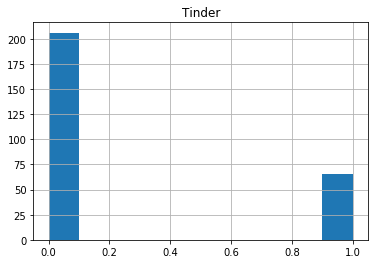

In [133]:
#GlownyArkusz_M.groupby('Sex').Age.hist()
GlownyArkusz_M.hist(column="Tinder")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5695138e80>]], dtype=object)

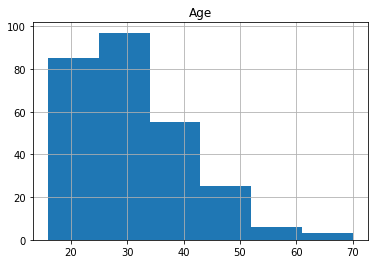

In [134]:
GlownyArkusz_M.hist(column='Age', bins=6)

Sex
1    Axes(0.125,0.125;0.775x0.755)
2    Axes(0.125,0.125;0.775x0.755)
Name: P10, dtype: object

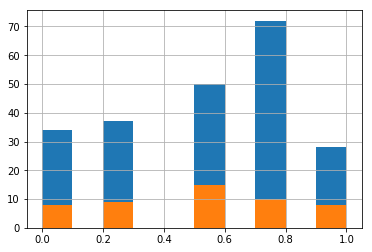

In [135]:
#GlownyArkusz_M.groupby('Sex').Tinder.hist()
GlownyArkusz_M.groupby("Sex").P10.hist()

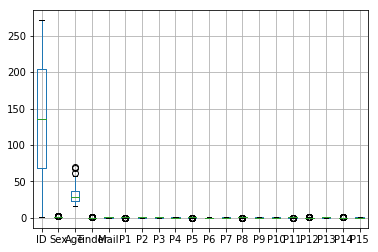

In [136]:
GlownyArkusz_M.boxplot()

Tinder
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: P11, dtype: object

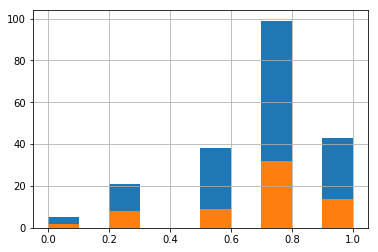

In [137]:
GlownyArkusz_M.groupby('Tinder').P11.hist()

In [138]:
#GlownyArkusz_M.groupby('P1').hist()


Tinder
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: P2, dtype: object

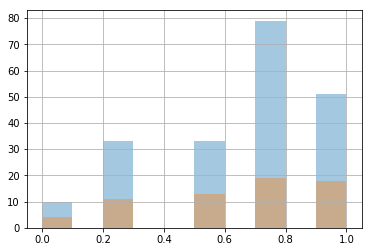

In [139]:

GlownyArkusz_M.groupby('Tinder').P2.hist(alpha=0.4)

In [143]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

iris = load_iris()
X, y = iris.data, iris.target
factor = FactorAnalysis(n_components=4, random_state=101).fit(X)
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA().fit(X)
print('Explained variance by component: %s' % pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_,columns=iris.feature_names))


Explained variance by component: [ 0.92461621  0.05301557  0.01718514  0.00518309]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361590         -0.082269           0.856572          0.358844
1           0.656540          0.729712          -0.175767         -0.074706
2          -0.580997          0.596418           0.072524          0.549061
3           0.317255         -0.324094          -0.479719          0.751121
